In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

/opt/homebrew/Caskroom/miniforge/base/envs/elec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [3]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220904 20230904


In [4]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [14]:
stocks = recommendation["Name"].to_list()

In [15]:
def get_close(data,start,end):
    tmp = pd.DataFrame()
    for n in stocks:
        tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
    return tmp

In [16]:
tmp = get_close(data,start,end)
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
2022-09-08,55600,90400,241500,644000,200000,80900,93800,20000,337500,80900,419500,72100,304500
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500
2023-08-31,66900,121800,579000,583000,189100,80200,98500,16660,270000,103300,452000,117600,331000


In [17]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [18]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]
rf = 0.0325
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

In [20]:
def get_portfolio(stocks,annual_ret,annual_cov):
  port_ret = []
  port_risk = []
  port_weights = []
  shape_ratio = []

  for i in range(30000):

      weights = np.random.random(len(stocks))
      weights /= np.sum(weights)


      returns = np.dot(weights, annual_ret)


      risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

      port_ret.append(returns)
      port_risk.append(risk)
      port_weights.append(weights)
      shape_ratio.append(returns/risk)

  portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
  for j, s in enumerate(stocks):
      portfolio[s] = [weight[j] for weight in port_weights]

  df = pd.DataFrame(portfolio)

  max_shape = df.loc[df['Shape'] == df['Shape'].max()]
  min_risk = df.loc[df['Risk'] == df['Risk'].min()]
  tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

  best_ret = tmp2.loc[0,'Returns']
  for i in range(tmp2.shape[0]):
    if tmp2.loc[i,'Returns']<best_ret:
      tmp2.drop(index=i,inplace=True)
    else:
      best_ret = tmp2.loc[i,'Returns']
  return max_shape,min_risk,tmp2,df

In [21]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

In [22]:
def show_CAPM(df, tmp2, max_shape, min_risk, rf=0.035):
    df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
    plt.plot(tmp2['Risk'], tmp2['Returns'], label='Efficient Frontier', linewidth=5,color='red')
    plt.scatter(max_shape['Risk'], max_shape['Returns'], label='Max_Shape', marker='*',s=500)
    plt.scatter(min_risk['Risk'], min_risk['Returns'], label='Min_risk', marker='*', s=500)
    plt.plot([0, max_shape['Risk'].iloc[0], 0.5], [rf, max_shape['Returns'].iloc[0], (max_shape['Returns'].iloc[0] - rf) / max_shape['Risk'].iloc[0] * 0.5 + rf], label='New EF', linewidth=2,color='green')
    plt.xlabel('Risk')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier Graph')
    plt.legend()
    plt.show()

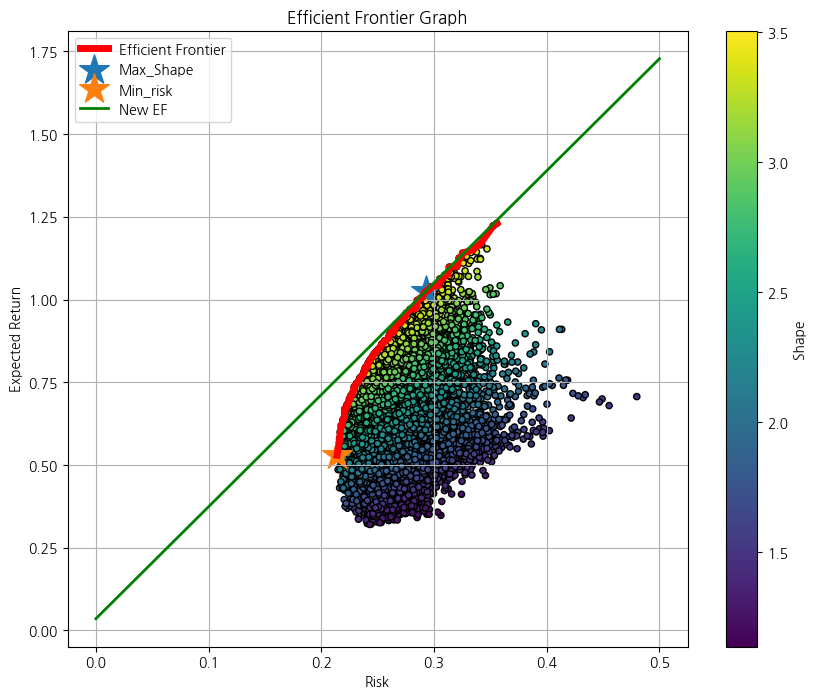

In [23]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.035)

In [24]:
def show_portfolio(max_shape):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import sympy
    exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100
    w = sympy.Symbol('w')

    equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

    solution = sympy.solve(equation, w)
    solution = float(solution[0])
    if solution < 0 :
        print(f"차입 비중 : {-solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
    else : 
        print(f"채권의 비중 : {solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
        
    if solution >= 0:

        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>기대수익을 위한 포트폴리오<br><sup>자기자본의 {solution*100:0.4}%만큼 채권투자</sup>"))


        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5]),
            name="기존 포트폴리오"),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]* (1-float(solution)))+[float(solution)] ,
            labels=list(max_shape.columns[-5:]) + ['채권'],
            domain=dict(x=[0.5, 1.0]),
            name="기대수익 포트폴리오"),
            row=1, col=2)

        fig.show()

    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("<b>포트폴리오", f"<b>투자금 비중</b><br><sup>자기자본의 {-solution*100:0.4}%만큼 차입</sup>"))


        fig.add_trace(go.Pie(
            values=list(max_shape.values[0][-5:]),
            labels=list(max_shape.columns[-5:]),
            domain=dict(x=[0, 0.5])),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=[1/(1-solution),1-(1/(1-solution))] ,
            labels=['자기자본','차입금'],
            domain=dict(x=[0.5, 1.0])),
            row=1, col=2)

        fig.show()

In [26]:
show_portfolio(max_shape)

채권의 비중 : 0.7217361670144788
이 경우 Risk : 0.08146208803045077


In [27]:
def geometric_brownian_motion(tmp,S0, T=100, dt=1/100):
    """
    S0: 초기값
    mu: 평균
    sigma: 표준 편차
    T: 시뮬레이션 시간
    dt: 시간 간격
    """

    # Brownian motion
    W = np.random.normal(0, 1, (T, 1))

    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** T) - 1

    # 변동성 계산
    mu = annual_return/T
    sigma = daily_returns.std()
    
    X = np.zeros((T, 1))
    X[0] = S0
    for t in range(1, T):
        X[t] = X[t - 1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * W[t])

    return X
    
def monte_sim(sim_num,tmp,stocks,stock_money,day=100):
    sim_num = sim_num
    balance_df = pd.DataFrame(np.zeros((sim_num,day)))
    for i in range(len(stocks)):
        X = []
        for k in range(sim_num):
            X.append(geometric_brownian_motion(tmp[stocks[i]],stock_money[stocks[i]].iloc[0]))
        balance_df += pd.DataFrame(np.array(X).reshape(sim_num,day))
    return balance_df.T

In [28]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
16685,572737.210796,122488.03243,120082.695761,176974.349944,7717.711069


In [29]:
sim_num = 1000
balance_df = monte_sim(sim_num,tmp,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06
1,9.982516e+05,997389.341814,1.004058e+06,1.008012e+06,9.868871e+05,1.003931e+06,1.021447e+06,1.039146e+06,9.856132e+05,1.010401e+06,...,1.001767e+06,9.991631e+05,1.000550e+06,9.979395e+05,987897.895486,9.939923e+05,954307.101001,9.829250e+05,9.912998e+05,9.953871e+05
2,1.016064e+06,973301.607611,1.000233e+06,1.002967e+06,9.689073e+05,1.035241e+06,9.984584e+05,1.038072e+06,9.776319e+05,9.825336e+05,...,1.013509e+06,1.012181e+06,1.002516e+06,1.033794e+06,964467.069565,9.743152e+05,977762.311443,9.952713e+05,1.014960e+06,1.023898e+06
3,9.996812e+05,957624.415519,9.895313e+05,9.723740e+05,9.562367e+05,1.035650e+06,1.028021e+06,1.052677e+06,9.567904e+05,1.018341e+06,...,9.929598e+05,1.019909e+06,9.971355e+05,1.075992e+06,975519.136631,9.941634e+05,960946.992211,9.807359e+05,1.037822e+06,1.069231e+06
4,9.773391e+05,975523.813058,9.750567e+05,9.517540e+05,9.753706e+05,1.036475e+06,1.048064e+06,1.048976e+06,9.528248e+05,1.048338e+06,...,9.884892e+05,1.032724e+06,1.020621e+06,1.058838e+06,992679.457929,1.018783e+06,979083.712042,9.591334e+05,1.029632e+06,1.042066e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.601512e+05,747862.976978,9.263264e+05,1.133519e+06,1.043127e+06,1.062289e+06,1.378117e+06,8.191460e+05,1.183500e+06,9.941834e+05,...,1.331518e+06,7.897380e+05,6.330393e+05,1.269999e+06,819095.843891,9.526890e+05,823855.103725,9.496863e+05,9.383259e+05,1.322173e+06
96,9.462842e+05,748462.312670,9.275164e+05,1.113963e+06,1.037764e+06,1.077746e+06,1.329884e+06,8.353937e+05,1.177827e+06,9.856725e+05,...,1.330071e+06,7.896039e+05,6.269556e+05,1.295644e+06,845995.272684,9.579916e+05,831999.259689,9.481176e+05,9.410453e+05,1.338534e+06
97,9.337018e+05,724475.984179,9.402288e+05,1.122128e+06,1.045676e+06,1.110030e+06,1.260123e+06,8.292960e+05,1.196935e+06,9.870083e+05,...,1.290894e+06,7.686290e+05,6.344315e+05,1.303438e+06,830347.319497,9.516486e+05,848624.478694,9.987177e+05,9.259952e+05,1.265702e+06
98,9.316433e+05,713728.674555,9.410196e+05,1.097559e+06,1.053371e+06,1.080277e+06,1.289449e+06,8.105554e+05,1.161799e+06,9.780716e+05,...,1.319150e+06,7.695313e+05,6.322662e+05,1.271848e+06,862031.944723,9.397171e+05,856715.991526,9.974041e+05,9.098274e+05,1.255605e+06


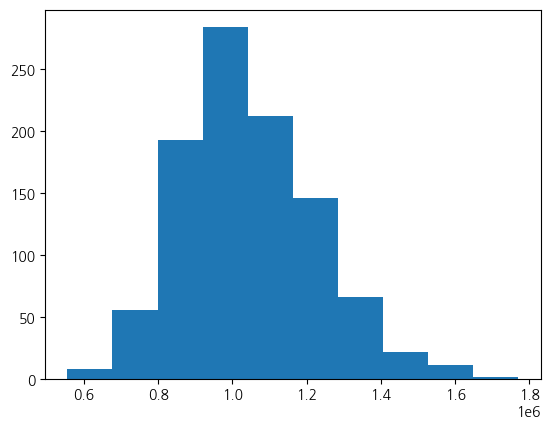

In [34]:
plt.hist(balance_df.iloc[99])
plt.show()

In [38]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') 
pd.DataFrame(balance_df.iloc[99].quantile([0.5,0.9]).to_numpy(),columns=['포트폴리오가치'],index=['50%','90%'])

,포트폴리오가치
50%,"1,026,177.87"
90%,"1,286,422.87"
